In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [54]:
df = pd.read_csv('csv/ldpr_users.csv')

df.head()

,id,first_name,last_name,bdate,city,country,school,sex,university
0,510,Анатолий,Карпенко,NaN,NaN,NaN,NaN,2,NaN
1,762,Константин,Белоус,NaN,Санкт-Петербург,Россия,NaN,2,NaN
2,2703,Герцог,Тельманский,NaN,NaN,NaN,NaN,2,NaN
3,3386,Антон,Тузяк,18.2.1988,Санкт-Петербург,Россия,NaN,2,NaN
4,3690,Денис,Шурупцев,17.12,Санкт-Петербург,Россия,NaN,2,NaN


**РАСПРЕДЕЛЕНИЕ ПО ПОЛУ**

In [55]:
# Подготовка данных для круговой диаграммы по полу
df = df.loc[df.sex != 0].reset_index()
sex_counts = df['sex'].value_counts()
sex_labels = ['Мужчины' if x == 2 else 'Женщины' for x in sex_counts.index]

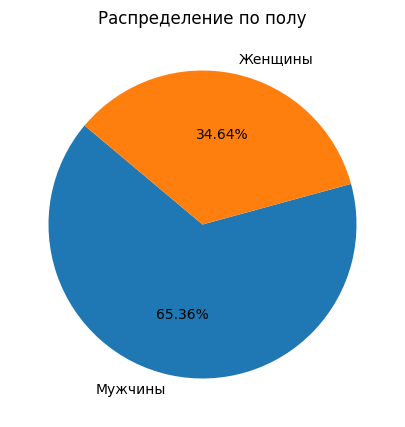

In [56]:
# Создание круговой диаграммы по полу
plt.figure(figsize=(10, 5))
plt.pie(sex_counts, labels=sex_labels, autopct='%1.2f%%', startangle=140)
plt.title('Распределение по полу')

# Показать круговую диаграмму
plt.show()

In [57]:
# Распределение по полу в числах
print("1 - женщины, 2 - мужчины")
sex_counts


1 - женщины, 2 - мужчины


sex
2    75657
1    40100
Name: count, dtype: int64

**РАСПРЕДЕЛЕНИЕ ПО ВОЗРАСТУ**

In [58]:
df1 = df.dropna(subset=['bdate'])
df1 = df1.loc[df1['bdate'].str.match(r'\d{1,2}\.\d{1,2}\.\d{4}') == True]
df1

,index,id,first_name,last_name,bdate,city,country,school,sex,university
3,3,3386,Антон,Тузяк,18.2.1988,Санкт-Петербург,Россия,NaN,2,NaN
5,5,5442,Владимир,Ворожбянский,18.1.1987,Санкт-Петербург,Россия,NaN,2,NaN
6,6,6302,Sergey,Chulkov,4.3.1987,Санкт-Петербург,Россия,NaN,2,NaN
8,8,8188,Антон,Минаков,14.11.1986,Санкт-Петербург,Россия,Ломоносовская гимназия №73,2,СПбГУТ им. Бонч-Бруевича
10,10,12005,Александр,Божко,16.9.1986,Москва,Россия,NaN,2,NaN
...,...,...,...,...,...,...,...,...,...,...
115750,115790,856001852,Владимир,Жириновский,25.4.1949,NaN,NaN,NaN,2,NaN
115752,115792,856467296,Роман,Вагнер,6.11.1991,NaN,NaN,NaN,2,NaN
115753,115793,857279694,アリス,メルニコワ,12.11.2004,Иваново,Россия,NaN,1,NaN
115754,115794,857587725,Марина,Яковлева,31.8.1983,Самара,Россия,NaN,1,NaN


In [59]:
# Подготовка данных для столбчатой диаграммы по годам рождения
# Извлечение года из даты рождения
df1['year'] = df1['bdate'].apply(lambda x: str(x).split('.')[-1])
df1['year'] = df1['year'].apply(lambda x: x if len(x) == 4 else None)
year_counts = df1['year'].value_counts().sort_index()

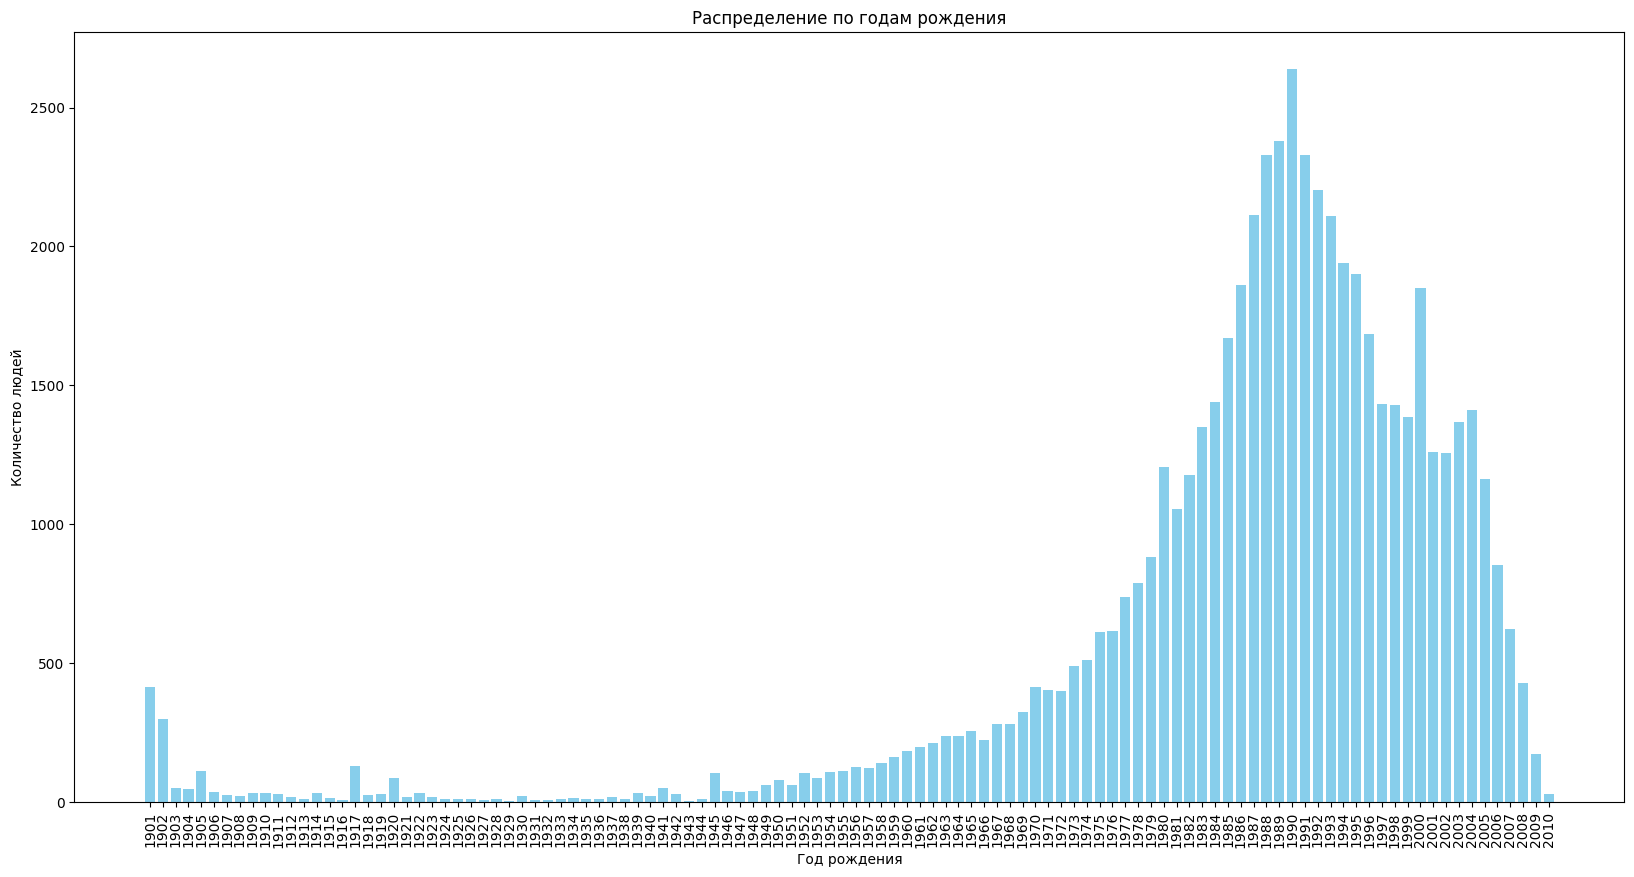

In [61]:
# Создание столбчатой диаграммы по годам рождения
plt.figure(figsize=(20, 10))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Год рождения')
plt.ylabel('Количество людей')
plt.title('Распределение по годам рождения')
plt.xticks(rotation=90)  # Поворот меток на оси X для лучшей читаемости

# Показать столбчатую диаграмму
plt.show()

In [62]:
from datetime import datetime, timedelta

# Функция для преобразования даты рождения в возраст
def calculate_age(born):
    born = datetime.strptime(born, "%d.%m.%Y").date()
    today = datetime.today().date()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [63]:
df1['age'] = df1['bdate'].apply(calculate_age)
df1

/tmp/ipykernel_381978/23937415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age'] = df1['bdate'].apply(calculate_age)


,index,id,first_name,last_name,bdate,city,country,school,sex,university,year,age
3,3,3386,Антон,Тузяк,18.2.1988,Санкт-Петербург,Россия,NaN,2,NaN,1988,36
5,5,5442,Владимир,Ворожбянский,18.1.1987,Санкт-Петербург,Россия,NaN,2,NaN,1987,37
6,6,6302,Sergey,Chulkov,4.3.1987,Санкт-Петербург,Россия,NaN,2,NaN,1987,37
8,8,8188,Антон,Минаков,14.11.1986,Санкт-Петербург,Россия,Ломоносовская гимназия №73,2,СПбГУТ им. Бонч-Бруевича,1986,37
10,10,12005,Александр,Божко,16.9.1986,Москва,Россия,NaN,2,NaN,1986,37
...,...,...,...,...,...,...,...,...,...,...,...,...
115750,115790,856001852,Владимир,Жириновский,25.4.1949,NaN,NaN,NaN,2,NaN,1949,74
115752,115792,856467296,Роман,Вагнер,6.11.1991,NaN,NaN,NaN,2,NaN,1991,32
115753,115793,857279694,アリス,メルニコワ,12.11.2004,Иваново,Россия,NaN,1,NaN,2004,19
115754,115794,857587725,Марина,Яковлева,31.8.1983,Самара,Россия,NaN,1,NaN,1983,40


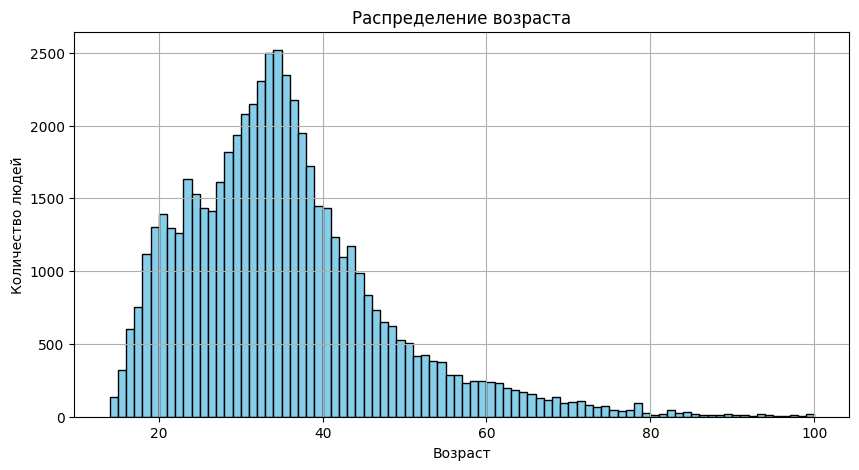

In [64]:
# Визуализация распределения возраста
plt.figure(figsize=(10, 5))
df1['age'].hist(bins=range(min(df1['age']), max(df1['age']) + 1, 1), color='skyblue', edgecolor='black')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')

# Показать гистограмму
plt.show()

**РАСПРЕДЕЛЕНИЕ ПО ГОРОДАМ**

проанализируем распределение аудитории по городам России

In [65]:
df2 = df.dropna(subset=['city'])
df2

,index,id,first_name,last_name,bdate,city,country,school,sex,university
1,1,762,Константин,Белоус,NaN,Санкт-Петербург,Россия,NaN,2,NaN
3,3,3386,Антон,Тузяк,18.2.1988,Санкт-Петербург,Россия,NaN,2,NaN
4,4,3690,Денис,Шурупцев,17.12,Санкт-Петербург,Россия,NaN,2,NaN
5,5,5442,Владимир,Ворожбянский,18.1.1987,Санкт-Петербург,Россия,NaN,2,NaN
6,6,6302,Sergey,Chulkov,4.3.1987,Санкт-Петербург,Россия,NaN,2,NaN
...,...,...,...,...,...,...,...,...,...,...
115744,115784,855240977,Михаил,Куликов,22.11.1997,Липецк,Россия,NaN,2,NaN
115749,115789,855905907,Илья,Рубежанский,26.11.1993,Пермь,Россия,NaN,2,NaN
115751,115791,856405616,Татьяна,Савицкая,NaN,Тоцкое Второе,Россия,NaN,1,NaN
115753,115793,857279694,アリス,メルニコワ,12.11.2004,Иваново,Россия,NaN,1,NaN


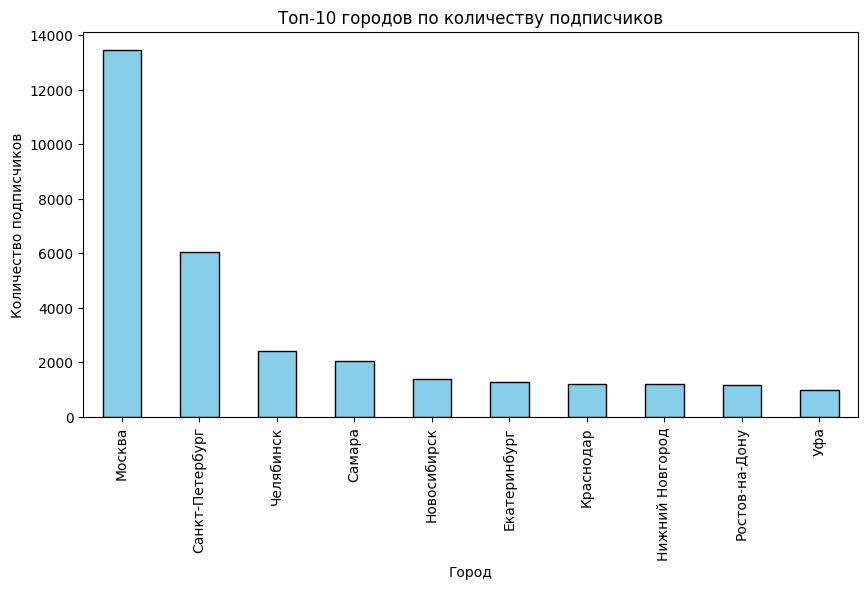

In [66]:
top_cities = df2['city'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
top_cities.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Топ-10 городов по количеству подписчиков')
plt.xlabel('Город')
plt.ylabel('Количество подписчиков')
plt.show()


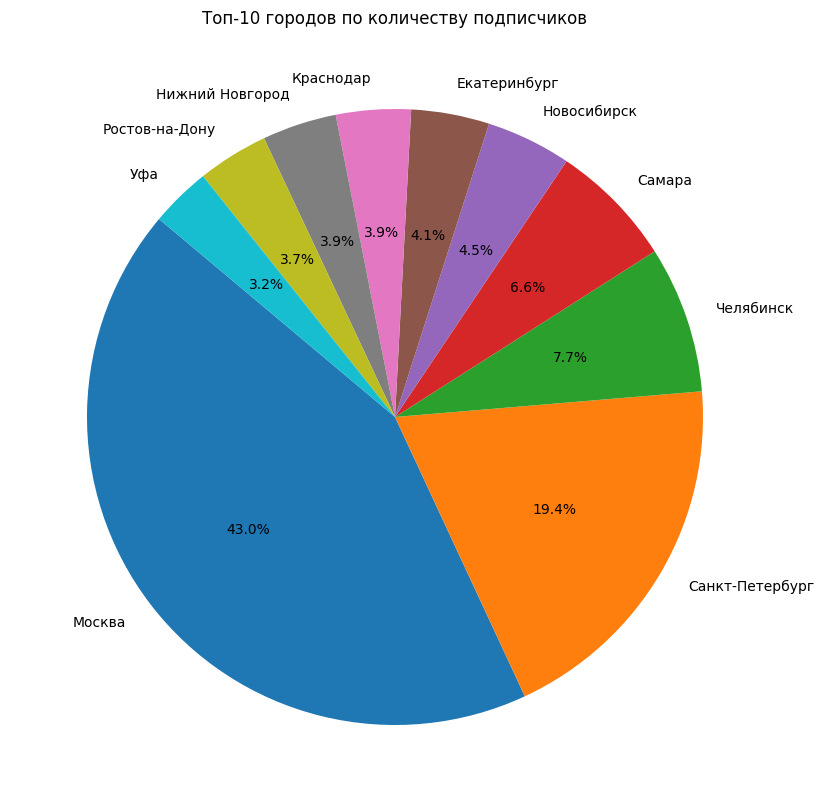

In [67]:
top_cities = df2['city'].value_counts().nlargest(10)
plt.figure(figsize=(10, 10))
plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%', startangle=140)
plt.title('Топ-10 городов по количеству подписчиков')
plt.show()


In [68]:
top_cities = df2['city'].value_counts().nlargest(10)
top_cities


city
Москва             13443
Санкт-Петербург     6061
Челябинск           2408
Самара              2049
Новосибирск         1394
Екатеринбург        1281
Краснодар           1226
Нижний Новгород     1219
Ростов-на-Дону      1164
Уфа                  991
Name: count, dtype: int64